In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression,SGDClassifier,Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import joblib

In [27]:
df = pd.read_csv(r"C:\Users\Vignesh\OneDrive\Desktop\Datascience\PROJECT1\Employee\Employee-Attrition_Processed.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Diploma,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Diploma,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Postgraduate,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,High School,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [29]:
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [30]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X = scaler.transform(X)

In [32]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), 
          AdaBoostClassifier(), KNeighborsClassifier(), SVC(), GaussianNB(), SGDClassifier(), Perceptron()]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ada Boost',
               'KNN', 'SVC', 'Naive Bayes', 'SGD Classifier', 'Perceptron']

accuracy = []
roc_auc = []

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
6,SVC,0.884354,0.564103
2,Random Forest,0.877551,0.549321
3,Gradient Boosting,0.877551,0.625339
0,Logistic Regression,0.863946,0.574057
5,KNN,0.857143,0.526697
4,Ada Boost,0.857143,0.548416
8,SGD Classifier,0.816327,0.611765
7,Naive Bayes,0.812925,0.664103
9,Perceptron,0.812925,0.544646
1,Decision Tree,0.772109,0.531976


In [33]:
for i in models:
    hyperparameters = dict()
    if i == LogisticRegression():
        hyperparameters = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == DecisionTreeClassifier():
        hyperparameters = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    elif i == RandomForestClassifier():
        hyperparameters = {'n_estimators': [10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
    elif i == GradientBoostingClassifier():
        hyperparameters = {'n_estimators': [10, 100, 1000], 'learning_rate': [0.001, 0.01, 0.1, 1]}
    elif i == AdaBoostClassifier():
        hyperparameters = {'n_estimators': [10, 100, 1000], 'learning_rate': [0.001, 0.01, 0.1, 1]}
    elif i == KNeighborsClassifier():
        hyperparameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    elif i == SVC():
        hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == GaussianNB():
        hyperparameters = {}
    elif i == SGDClassifier():
        hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
    elif i == Perceptron():
        hyperparameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
    clf = GridSearchCV(i, hyperparameters, cv=5)
    best_model = clf.fit(X_train, y_train)
    print(best_model.best_estimator_)
    print(best_model.best_score_)
    print(best_model.best_params_)

LogisticRegression()
0.8511936530833033
{}
DecisionTreeClassifier()
0.7839956725567977
{}
RandomForestClassifier()
0.851186440677966
{}
GradientBoostingClassifier()
0.8571366750811394
{}
AdaBoostClassifier()
0.8690551749008295
{}
KNeighborsClassifier()
0.8248359177785792
{}
SVC()
0.8469491525423729
{}
GaussianNB()
0.7899747565813199
{}
SGDClassifier()
0.7992967904796251
{}
Perceptron()
0.7815037865128021
{}


In [34]:
models = [LogisticRegression(C=0.001, penalty='l2'), DecisionTreeClassifier(criterion='entropy', max_depth=3), 
          RandomForestClassifier(n_estimators=100), 
          GradientBoostingClassifier(learning_rate=0.1, n_estimators=100), 
          AdaBoostClassifier(learning_rate=0.1, n_estimators=100), 
          KNeighborsClassifier(n_neighbors=1), SVC(C=0.001, kernel='linear'), 
          GaussianNB(), SGDClassifier(alpha=0.0001, penalty='l2'), Perceptron(alpha=0.0001, penalty='l2')]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
               'Ada Boost', 'KNN', 'SVC', 'Naive Bayes', 'SGD Classifier', 'Perceptron']

accuracy = []
roc_auc = []

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
3,Gradient Boosting,0.880952,0.627300
2,Random Forest,0.880952,0.551282
4,Ada Boost,0.874150,0.525641
0,Logistic Regression,0.867347,0.500000
6,SVC,0.867347,0.500000
8,SGD Classifier,0.863946,0.595777
1,Decision Tree,0.853741,0.503017
5,KNN,0.812925,0.555505
7,Naive Bayes,0.812925,0.664103
9,Perceptron,0.792517,0.663198


C:\Users\Vignesh\AppData\Local\Temp\ipykernel_33244\1553875050.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


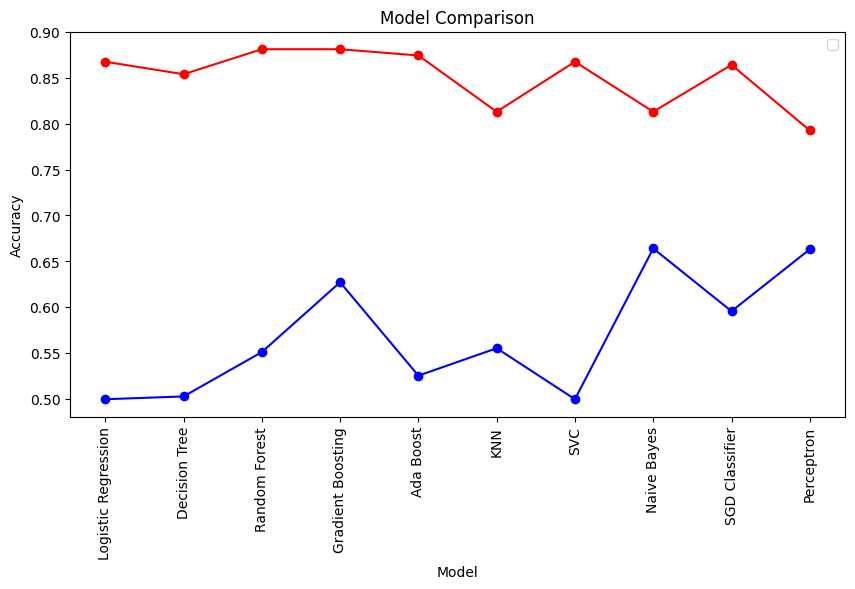

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'], color='red', marker='o')
plt.plot(model_comparison['Model'], model_comparison['ROC AUC'], color='blue', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

0.8707482993197279
0.5453996983408749


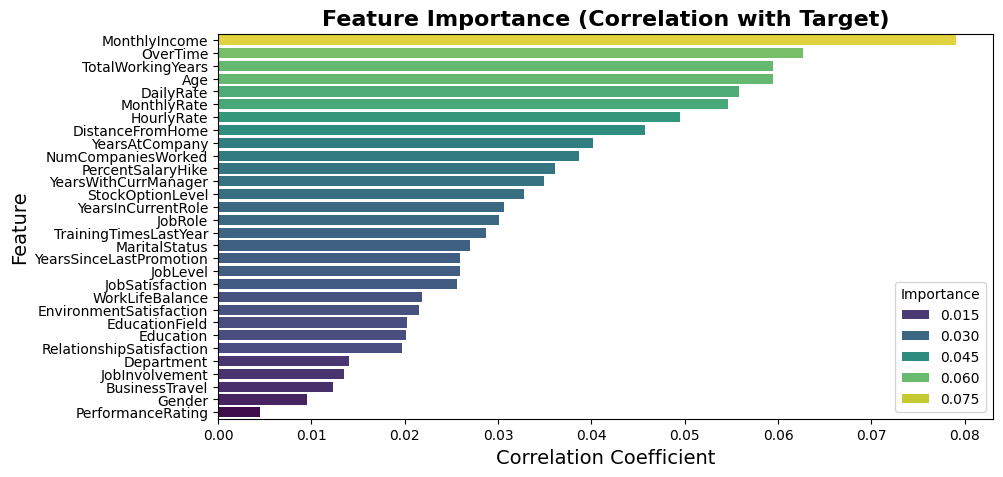

In [36]:
#Visualize feature importance with random forest


model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

X = df.drop("Attrition", axis=1)
feature_names = X.columns
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': RandomForestClassifier(n_estimators=100)
                 .fit(X_train, y_train)
                 .feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=importances['Importance'],
    y=importances['Feature'],
    hue=importances['Importance'],
    palette="viridis"
)
plt.title("Feature Importance (Correlation with Target)", fontweight="bold", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.show()


In [37]:
# Classification report for all models
for model, name in zip(models, model_names):
    print(f"Classification Report for {name}:\n")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.17      0.03      0.04        39

    accuracy                           0.85       294
   macro avg       0.52      0.50      0.48       294
weighted avg       0.78      0.85      0.80       294

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.10      0.19        39

    accuracy                           0.88       

c:\Users\Vignesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Vignesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Vignesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

In [39]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
def evaluate_and_store(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        try:
            y_prob = model.decision_function(X_test)
        except:
            y_prob = y_pred  # fallback to labels

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, zero_division=0),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    }

# Models and names
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    SVC(probability=True),
    GaussianNB(),
    SGDClassifier(max_iter=1000),
    Perceptron(max_iter=1000)
]

model_names = [
    'Logistic Regression', 'Decision Tree', 'Random Forest',
    'Gradient Boosting', 'Ada Boost', 'KNN',
    'SVC', 'Naive Bayes', 'SGD Classifier', 'Perceptron'
]

results = []
for model, name in zip(models, model_names):
    print(f"Evaluating {name}...")
    results.append(evaluate_and_store(model, X_train, X_test, y_train, y_test, name))

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort by Accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\n📊 Model Comparison:")
print(results_df)


Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Ada Boost...
Evaluating KNN...
Evaluating SVC...
Evaluating Naive Bayes...
Evaluating SGD Classifier...
Evaluating Perceptron...

📊 Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0                  SVC  0.884354   1.000000  0.128205  0.227273  0.769935
1    Gradient Boosting  0.877551   0.578947  0.282051  0.379310  0.756159
2        Random Forest  0.874150   0.666667  0.102564  0.177778  0.734439
3  Logistic Regression  0.863946   0.466667  0.179487  0.259259  0.711614
4                  KNN  0.857143   0.333333  0.076923  0.125000  0.635344
5            Ada Boost  0.857143   0.384615  0.128205  0.192308  0.741830
6           Perceptron  0.812925   0.233333  0.179487  0.202899  0.627451
7          Naive Bayes  0.812925   0.346154  0.461538  0.395604  0.719558
8       SGD Classifier  0.799320   0.250000  0.2564

In [40]:
#  Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294

Accuracy Score:  0.8741496598639455
ROC AUC Score:  0.5473604826546004


In [41]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_prob = rf.predict_proba(X_test)[:, 1]
risk_df = pd.DataFrame({
    "Employee ID": X_test.index if hasattr(X_test, "index") else range(len(X_test)),
    "Probability": y_pred_prob
})

risk_df = risk_df.sort_values(by="Probability", ascending=False).reset_index(drop=True)

print(risk_df.head(10))


   Employee ID  Probability
0           49         0.73
1           44         0.63
2          140         0.55
3          125         0.54
4          114         0.53
5            2         0.51
6           61         0.51
7           86         0.50
8           10         0.48
9          131         0.48


In [42]:
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[253   2]
 [ 35   4]]


In [62]:

y = df["Attrition"]

feature_cols = [
    "Gender",
    "Department", 
    "JobRole", 
    "OverTime",
    "JobSatisfaction",
    "Age",
    "MonthlyIncome",
    "YearsAtCompany",
    "TotalWorkingYears"
]

X = df[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = ["Gender", "Department", "JobRole", "OverTime", "JobSatisfaction"]
numeric_cols = ["Age", "MonthlyIncome", "YearsAtCompany", "TotalWorkingYears"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10))
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "attrition_model.pkl")
print("✅ Attrition model saved")

✅ Attrition model saved


In [61]:
y = df["PerformanceRating"]

feature_cols = [
    "JobRole", 
    "OverTime", 
    "JobInvolvement", 
    "WorkLifeBalance", 
    "JobSatisfaction", 
    "EnvironmentSatisfaction",
    "TrainingTimesLastYear", 
    "YearsAtCompany", 
    "YearsInCurrentRole", 
    "YearsWithCurrManager", 
    "TotalWorkingYears"
]

X = df[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = ["JobRole","OverTime","JobInvolvement","WorkLifeBalance","JobSatisfaction","EnvironmentSatisfaction"]
numeric_cols = ["TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsWithCurrManager","TotalWorkingYears"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10))
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "PerformanceRating_model.pkl")
print("✅ Performance Rating model saved successfully!")



✅ Performance Rating model saved successfully!


In [64]:


def categorize_promotion(years):
    if years <= 1:
        return "Soon"
    elif years <= 3:
        return "Later"
    else:
        return "Rare"

df["PromotionCategory"] = df["YearsSinceLastPromotion"].apply(categorize_promotion)

y = df["PromotionCategory"]

feature_cols = [
    "JobLevel",
    "TotalWorkingYears",
    "YearsInCurrentRole",
    "PerformanceRating",
    "Education",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsWithCurrManager"
]

X = df[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = ["JobLevel", "PerformanceRating", "Education"]
numeric_cols = ["TotalWorkingYears","YearsInCurrentRole","TrainingTimesLastYear","YearsAtCompany","YearsWithCurrManager"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(
        random_state=42, 
        n_estimators=200, 
        max_depth=12,
        class_weight="balanced"
    ))
])

# Train
pipeline.fit(X_train, y_train)


# Save model
joblib.dump(pipeline, "Promotion_model.pkl")
print("✅ Promotion model saved successfully!")


✅ Promotion model saved successfully!


In [46]:
import joblib

# Load your models
attrition_model = joblib.load("C:\\Users\\Vignesh\\Data science\\python\\Employee\\attrition_model.pkl")
promotion_model = joblib.load("C:\\Users\\Vignesh\\Data science\\python\\Employee\\PromotionLikelihood_model.pkl")
performance_model = joblib.load("C:\\Users\\Vignesh\\Data science\\python\\Employee\\PerformanceRating_model.pkl")


# Check feature names
print("Attrition model features:", getattr(attrition_model, "feature_names_in_", "No info"))
print("Performance model features:", getattr(performance_model, "feature_names_in_", "No info"))
print("Promotion model features:", getattr(promotion_model, "feature_names_in_", "No info"))


Attrition model features: ['Gender' 'Department' 'JobRole' 'OverTime' 'JobSatisfaction' 'Age'
 'MonthlyIncome' 'YearsAtCompany' 'TotalWorkingYears']
Performance model features: ['JobRole' 'OverTime' 'JobInvolvement' 'WorkLifeBalance' 'JobSatisfaction'
 'EnvironmentSatisfaction' 'TrainingTimesLastYear' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsWithCurrManager' 'TotalWorkingYears']
Promotion model features: ['JobLevel' 'TotalWorkingYears' 'YearsInCurrentRole' 'PerformanceRating'
 'Education' 'TrainingTimesLastYear' 'YearsAtCompany'
 'YearsWithCurrManager']
